# 1. Problem statement

1. To what extent can structured Airbnb data support decision-making frameworks for tourism planning?
2. What analytical frameworks are most suitable for leveraging Airbnb Big Data in strategic tourism planning?
3. How can structured data from Airbnb listings inform the adaptation of prescriptive models for demand   forecasting and host behavior analysis in tourism destinations?
4. Can forecasting models built on Airbnb data from one city be applied effectively to other cities for strategic tourism planning?

# 2. Data Collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from datetime import datetime

from sklearn.cluster import KMeans

import sklearn.model_selection

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df_1 = pd.read_csv("C:/Users/Pc/Desktop/Thesis/listings.csv", encoding="utf-8")

In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96651 entries, 0 to 96650
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              96651 non-null  int64  
 1   name                            96651 non-null  object 
 2   host_id                         96651 non-null  int64  
 3   host_name                       96611 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   96651 non-null  object 
 6   latitude                        96651 non-null  float64
 7   longitude                       96651 non-null  float64
 8   room_type                       96651 non-null  object 
 9   price                           62684 non-null  float64
 10  minimum_nights                  96651 non-null  int64  
 11  number_of_reviews               96651 non-null  int64  
 12  last_review                     

In [6]:
df_2 = pd.read_csv("C:/Users/Pc/Desktop/Thesis/listings 2.csv", encoding="utf-8")

In [7]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96651 entries, 0 to 96650
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            96651 non-null  int64  
 1   listing_url                                   96651 non-null  object 
 2   scrape_id                                     96651 non-null  int64  
 3   last_scraped                                  96651 non-null  object 
 4   source                                        96651 non-null  object 
 5   name                                          96651 non-null  object 
 6   description                                   93806 non-null  object 
 7   neighborhood_overview                         41983 non-null  object 
 8   picture_url                                   96642 non-null  object 
 9   host_id                                       96651 non-null 

In [8]:
df = df_1.merge(df_2, on="id", how="inner")

In [9]:
df.head()

,id,name_x,host_id_x,host_name_x,neighbourhood_group,neighbourhood_x,latitude_x,longitude_x,room_type_x,price_x,minimum_nights_x,number_of_reviews_x,last_review_x,reviews_per_month_x,calculated_host_listings_count_x,availability_365_x,number_of_reviews_ltm_x,license_x,listing_url,scrape_id,last_scraped,source,name_y,description,neighborhood_overview,picture_url,host_id_y,host_url,host_name_y,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_y,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude_y,longitude_y,property_type,room_type_y,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price_y,minimum_nights_y,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365_y,calendar_last_scraped,number_of_reviews_y,number_of_reviews_ltm_y,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review_y,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license_y,instant_bookable,calculated_host_listings_count_y,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month_y
0,264776,Huge Four Bedroom Apartment,1389063,Sue,NaN,Lewisham,51.44306,-0.01948,Entire home/apt,297.0,3,68,2025-05-28,0.51,11,293,12,NaN,https://www.airbnb.com/rooms/264776,20250610032232,2025-06-11,city scrape,Huge Four Bedroom Apartment,An extremely large and sunny four bedroom grou...,Catford is a well established London suburb. T...,https://a0.muscache.com/pictures/hosting/Hosti...,1389063,https://www.airbnb.com/users/show/1389063,Sue,2011-11-09,United Kingdom,I own the Glenthurston Apartments and have don...,within an hour,86%,100%,f,https://a0.muscache.com/im/pictures/user/a0985...,https://a0.muscache.com/im/pictures/user/a0985...,Bellingham,11.0,12.0,"['email', 'phone']",t,t,Neighborhood highlights,Lewisham,NaN,51.44306,-0.01948,Entire rental unit,Entire home/apt,10,2.0,2 baths,4.0,8.0,"[""Cooking basics"", ""Washer"", ""Iron"", ""Smoke al...",$297.00,3,365,3,3,1125,1125,3.0,1125.0,NaN,t,13,15,31,293,2025-06-11,68,12,1,134,15,110,32670.0,2014-07-03,2025-05-28,4.68,4.65,4.72,4.84,4.74,4.62,4.72,NaN,t,11,11,0,0,0.51
1,264777,One Bedroom Apartment,1389063,Sue,NaN,Lewisham,51.44284,-0.01997,Entire home/apt,98.0,3,24,2024-12-11,0.22,11,318,4,NaN,https://www.airbnb.com/rooms/264777,20250610032232,2025-06-11,city scrape,One Bedroom Apartment,Recently refurbished sunny one bedroom first f...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,1389063,https://www.airbnb.com/users/show/1389063,Sue,2011-11-09,United Kingdom,I own the Glenthurston Apartments and have don...,within an hour,86%,100%,f,https://a0.muscache.com/im/pictures/user/a0985...,https://a0.muscache.com/im/pictures/user/a0985...,Bellingham,11.0,12.0,"['email', 'phone']",t,t,NaN,Lewisham,NaN,51.44284,-0.01997,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""Cooking basics"", ""Wine glasses"", ""Iron"", ""Sm...",$98.00,3,365,3,3,1125,1125,3.0,1125.0,NaN,t,0,13,43,318,2025-06-11,24,4,0,157,7,37,3626.0,2016-07-21,2024-12-11,4.58,4.42,4.54,4.58,4.25,4.54,4.42,NaN,t,11,11,0,0,0.22
2,264778,Two Bedroom Newly Refurbished Apartment,1389063,Sue,NaN,Lewisham,51.44359,-0.02275,Entire home/apt,148.0,3,58,2025-05-01,0.43,11,302,6,NaN,https://www.airbnb.com/rooms/264778,20250610032232,2025-06-11,city scrape,Two Bedroom Newly Refurbished Apartment,A large and sunny two bedroom second floor

# 3. Data Cleaning

In [10]:
#Dropping duplicate columns

cols = df.columns
cols_x = [c for c in cols if c.endswith("_x")]
cols_y = [c for c in cols if c.endswith("_y")]

df = df.drop(columns= cols_x)

rename_dict = {col: col.replace("_y", "") for col in cols_y}
df = df.rename(columns=rename_dict)

In [11]:
df.head()

,id,neighbourhood_group,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,264776,NaN,https://www.airbnb.com/rooms/264776,20250610032232,2025-06-11,city scrape,Huge Four Bedroom Apartment,An extremely large and sunny four bedroom grou...,Catford is a well established London suburb. T...,https://a0.muscache.com/pictures/hosting/Hosti...,1389063,https://www.airbnb.com/users/show/1389063,Sue,2011-11-09,United Kingdom,I own the Glenthurston Apartments and have don...,within an hour,86%,100%,f,https://a0.muscache.com/im/pictures/user/a0985...,https://a0.muscache.com/im/pictures/user/a0985...,Bellingham,11.0,12.0,"['email', 'phone']",t,t,Neighborhood highlights,Lewisham,NaN,51.44306,-0.01948,Entire rental unit,Entire home/apt,10,2.0,2 baths,4.0,8.0,"[""Cooking basics"", ""Washer"", ""Iron"", ""Smoke al...",$297.00,3,365,3,3,1125,1125,3.0,1125.0,NaN,t,13,15,31,293,2025-06-11,68,12,1,134,15,110,32670.0,2014-07-03,2025-05-28,4.68,4.65,4.72,4.84,4.74,4.62,4.72,NaN,t,11,11,0,0,0.51
1,264777,NaN,https://www.airbnb.com/rooms/264777,20250610032232,2025-06-11,city scrape,One Bedroom Apartment,Recently refurbished sunny one bedroom first f...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,1389063,https://www.airbnb.com/users/show/1389063,Sue,2011-11-09,United Kingdom,I own the Glenthurston Apartments and have don...,within an hour,86%,100%,f,https://a0.muscache.com/im/pictures/user/a0985...,https://a0.muscache.com/im/pictures/user/a0985...,Bellingham,11.0,12.0,"['email', 'phone']",t,t,NaN,Lewisham,NaN,51.44284,-0.01997,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""Cooking basics"", ""Wine glasses"", ""Iron"", ""Sm...",$98.00,3,365,3,3,1125,1125,3.0,1125.0,NaN,t,0,13,43,318,2025-06-11,24,4,0,157,7,37,3626.0,2016-07-21,2024-12-11,4.58,4.42,4.54,4.58,4.25,4.54,4.42,NaN,t,11,11,0,0,0.22
2,264778,NaN,https://www.airbnb.com/rooms/264778,20250610032232,2025-06-11,city scrape,Two Bedroom Newly Refurbished Apartment,A large and sunny two bedroom second floor apa...,Catford is a well established London suburb. T...,https://a0.muscache.com/pictures/50662093/af12...,1389063,https://www.airbnb.com/users/show/1389063,Sue,2011-11-09,United Kingdom,I own the Glenthurston Apartments and have don...,within an hour,86%,100%,f,https://a0.muscache.com/im/pictures/user/a0985...,https://a0.muscache.com/im/pictures/user/a0985...,Bellingham,11.0,12.0,"['email', 'phone']",t,t,Neighborhood highlights,Lewisham,NaN,51.44359,-0.02275,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,3.0,"[""Cooking basics"", ""Iron"", ""Smoke alarm"", ""Fir...",$148.00,3,365,1,3,1125,1125,3.0,1125.0,NaN,t,3,6,27,302,2025-06-11,58,6,

In [12]:
#Dropping columns that all values are null 

df_clean = df.dropna(axis=1, how="all")
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96651 entries, 0 to 96650
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            96651 non-null  int64  
 1   listing_url                                   96651 non-null  object 
 2   scrape_id                                     96651 non-null  int64  
 3   last_scraped                                  96651 non-null  object 
 4   source                                        96651 non-null  object 
 5   name                                          96651 non-null  object 
 6   description                                   93806 non-null  object 
 7   neighborhood_overview                         41983 non-null  object 
 8   picture_url                                   96642 non-null  object 
 9   host_id                                       96651 non-null 

In [13]:
#Dropping columns that contain no meaningful values

df_cleaned = df_clean.drop(columns=["neighbourhood", "source", "listing_url",
                                    "host_thumbnail_url", "scrape_id", "last_scraped", "calendar_last_scraped", 
                                    "bathrooms", "last_review"], axis=1)

In [14]:
#1st Checking missing values

missing_info = df_cleaned.isnull().sum().to_frame(name="Missing count")
missing_info["Missing %"] = (missing_info["Missing count"] / len(df_cleaned)) * 100
missing_info = missing_info[missing_info["Missing count"] > 0].sort_values (by="Missing %", ascending=False)

print(missing_info)

                             Missing count  Missing %
neighborhood_overview                54668  56.562270
host_neighbourhood                   50360  52.104996
host_about                           47337  48.977248
beds                                 33975  35.152249
estimated_revenue_l365d              33967  35.143972
price                                33967  35.143972
host_response_time                   33024  34.168296
host_response_rate                   33024  34.168296
host_acceptance_rate                 27615  28.571872
review_scores_value                  25209  26.082503
review_scores_location               25209  26.082503
review_scores_checkin                25208  26.081468
review_scores_communication          25185  26.057671
review_scores_accuracy               25179  26.051464
review_scores_cleanliness            25173  26.045256
review_scores_rating                 25164  26.035944
first_review                         25164  26.035944
reviews_per_month           

In [15]:
df_cleaned.head()

,id,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,264776,Huge Four Bedroom Apartment,An extremely large and sunny four bedroom grou...,Catford is a well established London suburb. T...,https://a0.muscache.com/pictures/hosting/Hosti...,1389063,https://www.airbnb.com/users/show/1389063,Sue,2011-11-09,United Kingdom,I own the Glenthurston Apartments and have don...,within an hour,86%,100%,f,https://a0.muscache.com/im/pictures/user/a0985...,Bellingham,11.0,12.0,"['email', 'phone']",t,t,Lewisham,51.44306,-0.01948,Entire rental unit,Entire home/apt,10,2 baths,4.0,8.0,"[""Cooking basics"", ""Washer"", ""Iron"", ""Smoke al...",$297.00,3,365,3,3,1125,1125,3.0,1125.0,t,13,15,31,293,68,12,1,134,15,110,32670.0,2014-07-03,4.68,4.65,4.72,4.84,4.74,4.62,4.72,t,11,11,0,0,0.51
1,264777,One Bedroom Apartment,Recently refurbished sunny one bedroom first f...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,1389063,https://www.airbnb.com/users/show/1389063,Sue,2011-11-09,United Kingdom,I own the Glenthurston Apartments and have don...,within an hour,86%,100%,f,https://a0.muscache.com/im/pictures/user/a0985...,Bellingham,11.0,12.0,"['email', 'phone']",t,t,Lewisham,51.44284,-0.01997,Entire rental unit,Entire home/apt,2,1 bath,1.0,2.0,"[""Cooking basics"", ""Wine glasses"", ""Iron"", ""Sm...",$98.00,3,365,3,3,1125,1125,3.0,1125.0,t,0,13,43,318,24,4,0,157,7,37,3626.0,2016-07-21,4.58,4.42,4.54,4.58,4.25,4.54,4.42,t,11,11,0,0,0.22
2,264778,Two Bedroom Newly Refurbished Apartment,A large and sunny two bedroom second floor apa...,Catford is a well established London suburb. T...,https://a0.muscache.com/pictures/50662093/af12...,1389063,https://www.airbnb.com/users/show/1389063,Sue,2011-11-09,United Kingdom,I own the Glenthurston Apartments and have don...,within an hour,86%,100%,f,https://a0.muscache.com/im/pictures/user/a0985...,Bellingham,11.0,12.0,"['email', 'phone']",t,t,Lewisham,51.44359,-0.02275,Entire rental unit,Entire home/apt,4,1 bath,2.0,3.0,"[""Cooking basics"", ""Iron"", ""Smoke alarm"", ""Fir...",$148.00,3,365,1,3,1125,1125,3.0,1125.0,t,3,6,27,302,58,6,0,141,8,55,8140.0,2014-04-21,4.50,4.50,4.45,4.72,4.52,4.36,4.38,t,11,11,0,0,0.43
3,264779,Refurbished Two Bedroom Apartment,A large and sunny two bedroom second floor apa...,Catford is a well established London suburb. T...,https://a0.muscache.com/pictures/50660860/e440...,1389063,https://www.airbnb.com/users/show/1389063,Sue,2011-11-09,United Kingdom,I own the Glenthurston Apartments and have don...,within an hour,86%,100%,f,https://a0.muscache.com/im/pictures/user/a0985...,Bellingham,11.0,12.0,"['email', 'phone']",t,t,Lewisham,51.44355,-0.02309,Entire rental unit,Entire home/apt,5,1 bath,2.0,5.0,"[""Cooking basics"", ""Iron"", ""Smoke alarm"", ""Fir...",$144.00,3,365,3,3,1125,1125,3.0,1125.0,t,11,33,53,328,36,7,0,167

In [16]:
#Converting categorical features into numerical according to its context for better management 

binary_columns = [
    
    "host_is_superhost", "host_has_profile_pic", "host_identity_verified", "has_availability", "instant_bookable"
]

for col in binary_columns:
    df_cleaned[col] = df_cleaned[col].map({"t": 1, "f":0, "yes":1, "no":0})
    
percentage_columns = ["host_response_rate", "host_acceptance_rate"]

for col in percentage_columns:
    df_cleaned[col] = df_cleaned[col].str.rstrip("%").astype("float") / 100
    
df_cleaned["price"] = df_cleaned["price"].replace("[/$,]", "", regex=True).astype(float)


import re

def extract_bathrooms(text):
    if isinstance(text, str):
        match = re.search(r"([\d\.]+)", text)
        return float(match.group(1)) if match else None
    return None

df_cleaned["bathrooms_text"] = df_cleaned["bathrooms_text"].apply(extract_bathrooms)

In [17]:
df_cleaned.head()

,id,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,264776,Huge Four Bedroom Apartment,An extremely large and sunny four bedroom grou...,Catford is a well established London suburb. T...,https://a0.muscache.com/pictures/hosting/Hosti...,1389063,https://www.airbnb.com/users/show/1389063,Sue,2011-11-09,United Kingdom,I own the Glenthurston Apartments and have don...,within an hour,0.86,1.0,0.0,https://a0.muscache.com/im/pictures/user/a0985...,Bellingham,11.0,12.0,"['email', 'phone']",1.0,1.0,Lewisham,51.44306,-0.01948,Entire rental unit,Entire home/apt,10,2.0,4.0,8.0,"[""Cooking basics"", ""Washer"", ""Iron"", ""Smoke al...",297.0,3,365,3,3,1125,1125,3.0,1125.0,1.0,13,15,31,293,68,12,1,134,15,110,32670.0,2014-07-03,4.68,4.65,4.72,4.84,4.74,4.62,4.72,1,11,11,0,0,0.51
1,264777,One Bedroom Apartment,Recently refurbished sunny one bedroom first f...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,1389063,https://www.airbnb.com/users/show/1389063,Sue,2011-11-09,United Kingdom,I own the Glenthurston Apartments and have don...,within an hour,0.86,1.0,0.0,https://a0.muscache.com/im/pictures/user/a0985...,Bellingham,11.0,12.0,"['email', 'phone']",1.0,1.0,Lewisham,51.44284,-0.01997,Entire rental unit,Entire home/apt,2,1.0,1.0,2.0,"[""Cooking basics"", ""Wine glasses"", ""Iron"", ""Sm...",98.0,3,365,3,3,1125,1125,3.0,1125.0,1.0,0,13,43,318,24,4,0,157,7,37,3626.0,2016-07-21,4.58,4.42,4.54,4.58,4.25,4.54,4.42,1,11,11,0,0,0.22
2,264778,Two Bedroom Newly Refurbished Apartment,A large and sunny two bedroom second floor apa...,Catford is a well established London suburb. T...,https://a0.muscache.com/pictures/50662093/af12...,1389063,https://www.airbnb.com/users/show/1389063,Sue,2011-11-09,United Kingdom,I own the Glenthurston Apartments and have don...,within an hour,0.86,1.0,0.0,https://a0.muscache.com/im/pictures/user/a0985...,Bellingham,11.0,12.0,"['email', 'phone']",1.0,1.0,Lewisham,51.44359,-0.02275,Entire rental unit,Entire home/apt,4,1.0,2.0,3.0,"[""Cooking basics"", ""Iron"", ""Smoke alarm"", ""Fir...",148.0,3,365,1,3,1125,1125,3.0,1125.0,1.0,3,6,27,302,58,6,0,141,8,55,8140.0,2014-04-21,4.50,4.50,4.45,4.72,4.52,4.36,4.38,1,11,11,0,0,0.43
3,264779,Refurbished Two Bedroom Apartment,A large and sunny two bedroom second floor apa...,Catford is a well established London suburb. T...,https://a0.muscache.com/pictures/50660860/e440...,1389063,https://www.airbnb.com/users/show/1389063,Sue,2011-11-09,United Kingdom,I own the Glenthurston Apartments and have don...,within an hour,0.86,1.0,0.0,https://a0.muscache.com/im/pictures/user/a0985...,Bellingham,11.0,12.0,"['email', 'phone']",1.0,1.0,Lewisham,51.44355,-0.02309,Entire rental unit,Entire home/apt,5,1.0,2.0,5.0,"[""Cooking basics"", ""Iron"", ""Smoke alarm"", ""Fir...",144.0,3,365,3,3,1125,1125,3.0,1125.0,1.0,11,33,53,328

In [19]:
#Handling missing values in numerical features

numerical_columns = ["beds", "bedrooms", "price", "estimated_revenue_l365d", "bathrooms_text"]

for col in numerical_columns:
    df_cleaned[col].fillna(df_cleaned[col].median())
    
    
#target feature (different treatment)    
    
df_cleaned["reviews_per_month"].fillna(0.0)



review_score_columns = [   
    "review_scores_value", "review_scores_location", "review_scores_checkin", "review_scores_communication",
    "review_scores_accuracy", "review_scores_cleanliness", "review_scores_rating"    
]

for col in review_score_columns:
    df_cleaned[col].fillna(0.0)
    
    

df_cleaned["has_availability"].fillna(df_cleaned["has_availability"].mode()[0])


low_missing_columns = [
    "host_listings_count", "host_total_listings_count", "host_response_rate", "host_is_superhost", 
    "host_has_profile_pic", "host_identity_verified", "host_acceptance_rate"
]

for col in low_missing_columns:
    df_cleaned[col].fillna(df_cleaned[col].median())

In [20]:
#2nd Checking missing values

missing_info = df_cleaned.isnull().sum().to_frame(name="Missing count")
missing_info["Missing %"] = (missing_info["Missing count"] / len(df_cleaned)) * 100
missing_info = missing_info[missing_info["Missing count"] > 0].sort_values (by="Missing %", ascending=False)

print(missing_info)

                       Missing count  Missing %
neighborhood_overview          54668  56.562270
host_neighbourhood             50360  52.104996
host_about                     47337  48.977248
host_response_time             33024  34.168296
first_review                   25164  26.035944
host_location                  23328  24.136326
description                     2845   2.943581
host_name                         40   0.041386
host_since                        38   0.039317
host_picture_url                  38   0.039317
host_verifications                38   0.039317
picture_url                        9   0.009312


In [21]:
#Categorical features - handling missing values

df_cleaned["new_neighborhood_overview"] = df_cleaned["neighborhood_overview"].notna().astype(int)
df_cleaned["new_host_about"] = df_cleaned["host_about"].notna().astype(int)
df_cleaned["new_description"] = df_cleaned["description"].notna().astype(int)
df_cleaned["new_host_picture_url"] = df_cleaned["host_picture_url"].notna().astype(int)
df_cleaned["new_picture_url"] = df_cleaned["picture_url"].notna().astype(int)

clean_cat_df = df_cleaned.drop(columns=["neighborhood_overview", "host_about", "description", "host_picture_url",
                                         "picture_url"], axis=1)

In [22]:
#3rd Checking missing values

missing_info = clean_cat_df.isnull().sum().to_frame(name="Missing count")
missing_info["Missing %"] = (missing_info["Missing count"] / len(clean_cat_df)) * 100
missing_info = missing_info[missing_info["Missing count"] > 0].sort_values (by="Missing %", ascending=False)

print(missing_info)

                    Missing count  Missing %
host_neighbourhood          50360  52.104996
host_response_time          33024  34.168296
first_review                25164  26.035944
host_location               23328  24.136326
host_name                      40   0.041386
host_since                     38   0.039317
host_verifications             38   0.039317


In [24]:
categorical_columns = [
    "host_neighbourhood", "host_location", "host_name", "host_verifications", "host_response_time"
]


for col in categorical_columns:
    clean_cat_df[col].fillna("missing")

In [25]:
#4th Checking missing values

missing_info = clean_cat_df.isnull().sum().to_frame(name="Missing count")
missing_info["Missing %"] = (missing_info["Missing count"] / len(clean_cat_df)) * 100
missing_info = missing_info[missing_info["Missing count"] > 0].sort_values (by="Missing %", ascending=False)

print(missing_info)

              Missing count  Missing %
first_review          25164  26.035944
host_since               38   0.039317


In [26]:
#handling missing values related to date columns

clean_cat_df["first_review"] = pd.to_datetime(clean_cat_df["first_review"], errors="coerce")

clean_cat_df["first_review"] = clean_cat_df["first_review"].notna().astype(int)

clean_cat_df["host_since"] = pd.to_datetime(clean_cat_df["host_since"], errors="coerce")
new_df = clean_cat_df.dropna(subset=["host_since"])

In [27]:
#5th Checking missing values

missing_info = new_df.isnull().sum().to_frame(name="Missing count")
missing_info["Missing %"] = (missing_info["Missing count"] / len(new_df)) * 100
missing_info = missing_info[missing_info["Missing count"] > 0].sort_values (by="Missing %", ascending=False)

print(missing_info)

Empty DataFrame
Columns: [Missing count, Missing %]
Index: []


In [28]:
new_df.describe()

,id,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,new_neighborhood_overview,new_host_about,new_description,new_host_picture_url,new_picture_url
count,9.661300e+04,9.661300e+04,96613,96613.000000,96613.000000,96613.000000,96613.000000,96613.000000,96613.00000,96613.000000,96613.000000,96613.000000,96613.000000,96613.000000,96613.000000,96613.000000,96613.000000,96613.000000,9.661300e+04,96613.000000,96613.000000,9.661300e+04,9.661300e+04,96613.000000,9.661300e+04,96613.0,96613.000000,96613.000000,96613.000000,96613.000000,96613.000000,96613.000000,96613.000000,96613.000000,96613.000000,96613.000000,9.661300e+04,96613.000000,96613.000000,96613.000000,96613.000000,96613.000000,96613.000000,96613.000000,96613.000000,96613.000000,96613.000000,96613.000000,96613.000000,96613.000000,96613.000000,96613.000000,96613.000000,96613.000000,96613.0,96613.000000
mean,6.526677e+17,2.092020e+08,2017-12-26 12:33:18.290085120,0.947011,0.860460,0.179779,46.263577,76.334945,0.95659,0.876166,51.509814,-0.127100,3.316841,1.335736,1.525364,1.610280,185.841926,5.428845,6.084799e+03,4.745138,8.686605,2.729012e+05,2.951565e+05,6.287615,2.950852e+05,1.0,8.182895,19.647604,33.292300,139.701117,20.888369,5.633300,0.490979,81.855216,5.054320,45.577831,8.150443e+03,0.739662,3.469476,3.499392,3.441281,3.542930,3.561398,3.499033,3.417852,0.312960,16.395340,14.176136,2.165361,0.025773,0.709164,0.434434,0.510428,0.970563,1.0,0.999907
min,1.391300e+04,2.594000e+03,2008-08-28 00:00:00,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,51.295937,-0.496760,1.000000,0.000000,0.000000,0.000000,6.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,2.956380e+07,2.673176e+07,2015-02-07 00:00:00,1.000000,0.880000,0.000000,1.000000,1.000000,1.00000,1.000000,51.484232,-0.189080,2.000000,1.000000,1.000000,1.000000,106.000000,1.000000,6.000000e+01,1.000000,1.000000,9.000000e+01,9.900000e+01,1.000000,9.900000e+01,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.540000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.000000
50%,8.126773e+17,1.128684e+08,2017-01-25 00:00:00,1.000000,0.970000,0.000000,2.000000,3.000000,1.00000,1.000000,51.513790,-0.127000,2.000000,1.000000,1.000000,1.000000,135.000000,2.000000,3.650000e+02,2.000000,3.000000,3.650000e+02,3.650000e+02,2.000000,3.650000e+02,1.0,3.000000,12.000000,25.000000,93.000000,4.000000,0.000000,0.000000,68.000000,0.000000,0.000000,2.775000e+03,1.000000,4.680000,4.750000,4.650000,4.830000,4.870000,4.720000,4.600000,0.000000,2.000000,1.000000,0.000000,0.000000,0.220000,0.000000,1.000000,1.000000,1.0,1

In [29]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96613 entries, 0 to 96650
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            96613 non-null  int64         
 1   name                                          96613 non-null  object        
 2   host_id                                       96613 non-null  int64         
 3   host_url                                      96613 non-null  object        
 4   host_name                                     96613 non-null  object        
 5   host_since                                    96613 non-null  datetime64[ns]
 6   host_location                                 96613 non-null  object        
 7   host_response_time                            96613 non-null  object        
 8   host_response_rate                            96613 non-null  float64  

# 4. Data Preprocessing

In [30]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96613 entries, 0 to 96650
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            96613 non-null  int64         
 1   name                                          96613 non-null  object        
 2   host_id                                       96613 non-null  int64         
 3   host_url                                      96613 non-null  object        
 4   host_name                                     96613 non-null  object        
 5   host_since                                    96613 non-null  datetime64[ns]
 6   host_location                                 96613 non-null  object        
 7   host_response_time                            96613 non-null  object        
 8   host_response_rate                            96613 non-null  float64  

In [31]:
# 1st Feature engineering section - column 0 to 10 

#dropping id, host_id, host_url, host_name - features with unique identifier

first_df = new_df.drop(columns=["id", "host_id", "host_url", "host_name"])

#host_since: extracting the amount of time that a host is in the platform

first_df["host_since"] = pd.to_datetime(first_df["host_since"], errors="coerce")
first_df["host_tenure_days"] = (datetime.now() - first_df["host_since"]).dt.days

#host_location: as the information is disperse it will be extracted if the host is from UK (Airbnb location) or not 
# 1 = Host is in UK; 0 = Host is not in the UK; -1 = Host location info is missing 

first_df["host_is_local"] = first_df["host_location"].apply(
    lambda x: 1 if isinstance(x,str) and "United Kingdom" in x else(0 if isinstance(x,str) else -1)
)

second_df = first_df.drop(columns=["host_location"])

In [32]:
second_df.head(20)

,name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,new_neighborhood_overview,new_host_about,new_description,new_host_picture_url,new_picture_url,host_tenure_days,host_is_local
0,Huge Four Bedroom Apartment,2011-11-09,within an hour,0.86,1.00,0.0,Bellingham,11.0,12.0,"['email', 'phone']",1.0,1.0,Lewisham,51.443060,-0.019480,Entire rental unit,Entire home/apt,10,2.0,4.0,8.0,"[""Cooking basics"", ""Washer"", ""Iron"", ""Smoke al...",297.0,3,365,3,3,1125,1125,3.0,1125.0,1.0,13,15,31,293,68,12,1,134,15,110,32670.0,1,4.68,4.65,4.72,4.84,4.74,4.62,4.72,1,11,11,0,0,0.51,1,1,1,1,1,5027,1
1,One Bedroom Apartment,2011-11-09,within an hour,0.86,1.00,0.0,Bellingham,11.0,12.0,"['email', 'phone']",1.0,1.0,Lewisham,51.442840,-0.019970,Entire rental unit,Entire home/apt,2,1.0,1.0,2.0,"[""Cooking basics"", ""Wine glasses"", ""Iron"", ""Sm...",98.0,3,365,3,3,1125,1125,3.0,1125.0,1.0,0,13,43,318,24,4,0,157,7,37,3626.0,1,4.58,4.42,4.54,4.58,4.25,4.54,4.42,1,11,11,0,0,0.22,0,1,1,1,1,5027,1
2,Two Bedroom Newly Refurbished Apartment,2011-11-09,within an hour,0.86,1.00,0.0,Bellingham,11.0,12.0,"['email', 'phone']",1.0,1.0,Lewisham,51.443590,-0.022750,Entire rental unit,Entire home/apt,4,1.0,2.0,3.0,"[""Cooking basics"", ""Iron"", ""Smoke alarm"", ""Fir...",148.0,3,365,1,3,1125,1125,3.0,1125.0,1.0,3,6,27,302,58,6,0,141,8,55,8140.0,1,4.50,4.50,4.45,4.72,4.52,4.36,4.38,1,11,11,0,0,0.43,1,1,1,1,1,5027,1
3,Refurbished Two Bedroom Apartment,2011-11-09,within an hour,0.86,1.00,0.0,Bellingham,11.0,12.0,"['email', 'phone']",1.0,1.0,Lewisham,51.443550,-0.023090,Entire rental unit,Entire home/apt,5,1.0,2.0,5.0,"[""Cooking basics"", ""Iron"", ""Smoke alarm"", ""Fir...",144.0,3,365,3,3,1125,1125,3.0,1125.0,1.0,11,33,53,328,36,7,0,167,7,64,9216.0,1,4.64,4.67,4.58,4.83,4.61,4.50,4.47,1,11,11,0,0,0.30,1,1,1,1,1,5027,1
4,Spacious refurbished 2 bedroom apt with balcony,2011-11-09,within an hour,0.86,1.00,0.0,Bellingham,11.0,12.0,"['email', 'phone']",1.0,1.0,Lewisham,51.443330,-0.023070,Entire rental unit,Entire home/apt,4,2.0,2.0,4.0,"[""Cooking basics"", ""Washer"", ""Iron"", ""Smoke al...",157.0,3,365,3,3,1125,1125,3.0,1125.0,1.0,0,9,11,255,54,4,0,101,7,37,5809.0,1,4.68,4.78,4.65,4.81,4.74,4.37,4.59,1,11,11,0,0,0.35,0,1,1,1,1,5027,1
5,Two Bedrooms Garden Maisonette,2011-11-09,within an hour,0.86,1.00,0.0,Bellingham,11.0,12.0,"['email', 'phone']",1.0,1.0,Lewisham,51.442040,-0.021490,Entire rental unit,Entire home/apt,3,2.0,2.0,2.0,"[""Cooking basics"", ""Washer"", ""Iron"", ""Smoke al...",148.0,3,365,3,3,1125,1125,3.0,1125.0,1.0,2,2,27,274,8,0,0,113,0,0,0.0,1,3.88,4.13,3.75,4.88,4.63,4.50,4.13,1,11,11,0,0,0.09,1,1,1,1,1,5027,1
6,One Bedroom Garden Apartment,2011-11-09,within an hour,0.86,1.00,0.0,Bellingham,11.0,12.0,"['email', 'phone']",1.0,1.0,Lewisham,51.443530,-0.023280,Entire rental unit,Entire home/apt,4,1.0,1.0,3.0,"[""Cooking basics"", ""Washer"", ""Iron"", ""Smoke al...",120.0,4,365,4,4,1125,1125,4.0,1125.0,1

In [33]:
# 2nd Feature engineering section

#Price feature - creating price per guest

second_df["price_per_guest"] = second_df.apply(
    lambda row: round(row["price"] / row["accommodates"], 2) if row ["accommodates"] 
    and row["accommodates"]> 0 else round(row['price'], 2), axis=1
)

#Latitude and longitud - creating clusters for better understanding 

coords = second_df[["latitude", "latitude"]]

k = 20
kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
second_df["location_cluster"] = kmeans.fit_predict(second_df[["latitude", "latitude"]])

#Minimum_nights - creating bins to categorize 

def categorize_min_nights(n):
    if n<= 3:
        return "short_stay"
    elif n<=14:
        return "mid_stay"
    else:
        return "long_stay"
    
second_df["min_nights_category"] = second_df["minimum_nights"].apply(categorize_min_nights)

#dropping engineered features:

third_df = second_df.drop(columns=["latitude", "latitude", "price", "accommodates", "minimum_nights", ])

In [34]:
# 3rd Feature engineering section

#Amenities

import ast

third_df["amenities_list"] = third_df["amenities"].apply(ast.literal_eval)

third_df["amenities_count"] = third_df["amenities_list"].apply(len)

key_amenities = [
    "Wifi", "Kitchen", "Heating", "Washer", "Air conditioning", "Cooking basics", "Air conditioning", "TV",
    "Elevator", "First aid kit", "Smoke alarm", "Self check-in", "Essentials"
]

for amenity in key_amenities:
    third_df[f"amenity_{amenity.lower().replace(' ', '_')}"] = third_df["amenities_list"].apply(
        lambda x: 1 if amenity in x else 0)

    
#Maximum_nights 

max_night_cap = 365

third_df["maximum_nights_capped"] = third_df["maximum_nights"].apply(lambda x: min(x, max_night_cap))
    
#dropping features non needed

fourth_df = third_df.drop(columns=["amenities", "amenities_list", "maximum_nights"])

In [35]:
# 4th Feature engineering section

#in this section some columns that contain redundant information will be dropped

fifth_df = fourth_df.drop(columns=["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights",
                                  "maximum_maximum_nights", "availability_60", "availability_90"])

In [36]:
fifth_df.head()

,name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,longitude,property_type,room_type,bathrooms_text,bedrooms,beds,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,new_neighborhood_overview,new_host_about,new_description,new_host_picture_url,new_picture_url,host_tenure_days,host_is_local,price_per_guest,location_cluster,min_nights_category,amenities_count,amenity_wifi,amenity_kitchen,amenity_heating,amenity_washer,amenity_air_conditioning,amenity_cooking_basics,amenity_tv,amenity_elevator,amenity_first_aid_kit,amenity_smoke_alarm,amenity_self_check-in,amenity_essentials,maximum_nights_capped
0,Huge Four Bedroom Apartment,2011-11-09,within an hour,0.86,1.0,0.0,Bellingham,11.0,12.0,"['email', 'phone']",1.0,1.0,Lewisham,-0.01948,Entire rental unit,Entire home/apt,2.0,4.0,8.0,3.0,1125.0,1.0,13,293,68,12,1,134,15,110,32670.0,1,4.68,4.65,4.72,4.84,4.74,4.62,4.72,1,11,11,0,0,0.51,1,1,1,1,1,5027,1,29.70,15,short_stay,35,1,1,1,1,0,1,1,0,1,1,1,1,365
1,One Bedroom Apartment,2011-11-09,within an hour,0.86,1.0,0.0,Bellingham,11.0,12.0,"['email', 'phone']",1.0,1.0,Lewisham,-0.01997,Entire rental unit,Entire home/apt,1.0,1.0,2.0,3.0,1125.0,1.0,0,318,24,4,0,157,7,37,3626.0,1,4.58,4.42,4.54,4.58,4.25,4.54,4.42,1,11,11,0,0,0.22,0,1,1,1,1,5027,1,49.00,15,short_stay,44,1,1,1,0,0,1,1,0,1,1,1,1,365
2,Two Bedroom Newly Refurbished Apartment,2011-11-09,within an hour,0.86,1.0,0.0,Bellingham,11.0,12.0,"['email', 'phone']",1.0,1.0,Lewisham,-0.02275,Entire rental unit,Entire home/apt,1.0,2.0,3.0,3.0,1125.0,1.0,3,302,58,6,0,141,8,55,8140.0,1,4.50,4.50,4.45,4.72,4.52,4.36,4.38,1,11,11,0,0,0.43,1,1,1,1,1,5027,1,37.00,15,short_stay,27,1,1,1,0,0,1,1,0,1,1,1,1,365
3,Refurbished Two Bedroom Apartment,2011-11-09,within an hour,0.86,1.0,0.0,Bellingham,11.0,12.0,"['email', 'phone']",1.0,1.0,Lewisham,-0.02309,Entire rental unit,Entire home/apt,1.0,2.0,5.0,3.0,1125.0,1.0,11,328,36,7,0,167,7,64,9216.0,1,4.64,4.67,4.58,4.83,4.61,4.50,4.47,1,11,11,0,0,0.30,1,1,1,1,1,5027,1,28.80,15,short_stay,29,1,1,1,0,0,1,1,0,1,1,1,1,365
4,Spacious refurbished 2 bedroom apt with balcony,2011-11-09,within an hour,0.86,1.0,0.0,Bellingham,11.0,12.0,"['email', 'phone']",1.0,1.0,Lewisham,-0.02307,Entire rental unit,Entire home/apt,2.0,2.0,4.0,3.0,1125.0,1.0,0,255,54,4,0,101,7,37,5809.0,1,4.68,4.78,4.65,4.81,4.74,4.37,4.59,1,11,11,0,0,0.35,0,1,1,1,1,5027,1,39.25,15,short_stay,35,1,1,1,1,0,1,1,0,1,1,1,1,365


reviews_per_month                               1.000000
number_of_reviews_ltm                           0.818345
number_of_reviews_l30d                          0.759471
estimated_occupancy_l365d                       0.753206
number_of_reviews_ly                            0.694423
number_of_reviews                               0.566253
review_scores_cleanliness                       0.362794
review_scores_value                             0.359394
review_scores_communication                     0.359272
review_scores_checkin                           0.358557
review_scores_location                          0.358298
review_scores_accuracy                          0.357836
review_scores_rating                            0.357525
host_is_superhost                               0.289146
amenities_count                                 0.259174
amenity_self_check-in                           0.244469
amenity_cooking_basics                          0.188518
host_acceptance_rate           

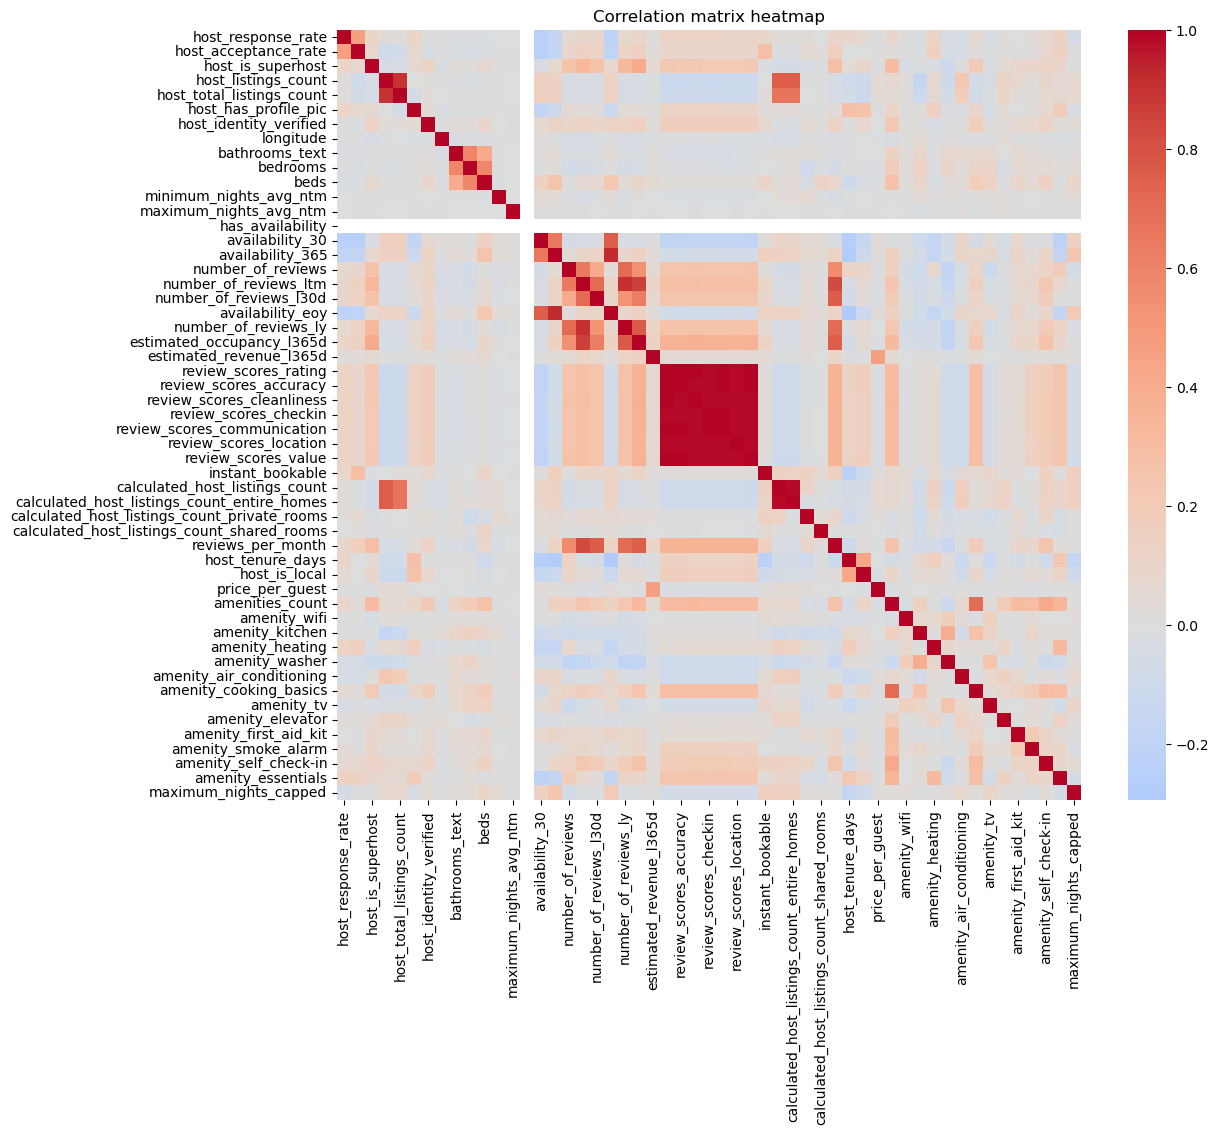

In [37]:
# Evaluation of the correlation among features in order to drop features that are not relevant for the target

numeric_cols = fifth_df.select_dtypes(include=["float64", "int64"]).columns

corr_matrix = fifth_df[numeric_cols].corr()

target_corr = corr_matrix["reviews_per_month"].sort_values(ascending=False)
print(target_corr)

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Correlation matrix heatmap")
plt.show()

In [38]:
#Defining low correlated features and dropping = features with below 0.01

low_correlated_features = [
    
    "new_picture_url", "maximum_nights_capped", "maximum_nights_avg_ntm", "amenity_air_conditioning", 
    "price_per_guest", "amenity_elevator", "amenity_tv", "availability_30", "amenity_wifi", "longitude", 
    "bathrooms_text", "calculated_host_listings_count", "minimum_nights_avg_ntm", 
    "calculated_host_listings_count_entire_homes", "host_total_listings_count", "host_listings_count", "bedrooms", 
    "amenity_heating", "amenity_kitchen", "host_tenure_days", "amenity_washer", "has_availability", 
    "new_host_picture_url"
]

df_preprocessed = fifth_df.drop(columns=low_correlated_features, axis=1)

In [39]:
#Spltting into train and test data 


df_train, df_test = sklearn.model_selection.train_test_split(df_preprocessed, test_size=0.2)

print("fifth_df", df_preprocessed.shape)
print("df_train", df_train.shape)
print("df_test", df_test.shape)

fifth_df (96613, 46)
df_train (77290, 46)
df_test (19323, 46)


In [40]:
#Defining variables

x_train = df_train.drop("reviews_per_month", axis=1)
y_train = df_train["reviews_per_month"]
x_test = df_test.drop("reviews_per_month", axis=1)
y_test = df_test["reviews_per_month"]

print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (77290, 45)
y_train (77290,)
x_test (19323, 45)
y_test (19323,)


# 5. Feature Engineering

In [41]:
#Encoding and Normalization of data points

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

categorical_features = x_train.select_dtypes(include=["object","category"]).columns.tolist()
numerical_features = x_train.select_dtypes(include=["int64", "float64"]).columns.tolist()

categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
)

x_train_preprocessed = preprocessor.fit_transform(x_train)
x_test_preprocessed = preprocessor.transform(x_test)

# 6. Model Training

In [42]:
import sklearn.model_selection
import sklearn.ensemble

In [43]:
# 1st Experiment - Lasso Regression

from sklearn.linear_model import LassoCV
from sklearn.model_selection import ShuffleSplit

alphas = np.logspace(-3, 0, 15)
cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=42)

lasso_cv = LassoCV(alphas=alphas, cv=cv, random_state=42, max_iter=1000, verbose=True, n_jobs=-1)

lasso_cv.fit(x_train_preprocessed, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
.............................................[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 26.1min finished


LassoCV(alphas=array([0.001     , 0.00163789, 0.0026827 , 0.00439397, 0.00719686,
       0.01178769, 0.01930698, 0.03162278, 0.05179475, 0.08483429,
       0.13894955, 0.22758459, 0.37275937, 0.61054023, 1.        ]),
        cv=ShuffleSplit(n_splits=3, random_state=42, test_size=0.3, train_size=None),
        n_jobs=-1, random_state=42, verbose=True)

In [44]:
# 2nd Experiment - Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {
    "alpha": np.logspace(-4, 4, 50)
}

cv_ridge = ShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

ridge = GridSearchCV(
    estimator=Ridge(),
    param_grid=param_grid,
    cv=cv_ridge, 
    verbose=2,
    n_jobs=-1
)

ridge.fit(x_train_preprocessed, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=42, test_size=0.2, train_size=None),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-0...
       8.28642773e-01, 1.20679264e+00, 1.75751062e+00, 2.55954792e+00,
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04])},
             verbose=2)

In [45]:
# 3rd Experiment - Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

cv_rf = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

param_grid = {
    "n_estimators": [50, 75, 100],
    "max_depth": [10, 20, None]
}

rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=cv_rf, 
    verbose=2,
    n_jobs=-1
)

rf.fit(x_train_preprocessed, y_train)

# printing best parameters
rf_best = rf.best_estimator_
print(" Best Parameters:", rf.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
 Best Parameters: {'max_depth': None, 'n_estimators': 75}


In [46]:
# 4th Experiment - Support Vector Regression (SVR)

from sklearn.svm import LinearSVR

linear_svr = LinearSVR(C=0.5, epsilon=0.2, random_state=42, tol=1e-2, max_iter=5000)

linear_svr.fit(x_train_preprocessed, y_train)

LinearSVR(C=0.5, epsilon=0.2, max_iter=5000, random_state=42, tol=0.01)

In [47]:
# 5th Experiment - XGBoost

from xgboost import XGBRegressor

param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.05, 0.1, 0.2],
    "subsample": [0.7, 1.0],
    "colsample_bytree": [0.7, 1.0],
}

cv_xgb = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

xgb = XGBRegressor(
    n_jobs=-1,
    verbosity=1,
    random_state=42,
    tree_method="hist"
)

xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=cv_xgb,
    verbose=2,
    n_jobs=-1
)

xgb_grid.fit(x_train_preprocessed, y_train)

xgb_best = xgb_grid.best_estimator_
print("Best Parameters:", xgb_grid.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.7}


# 7. Model Evaluation

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def regression_report(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print("Regression metrics report:")
    print(f" Mean Squared Error (MSE): {mse:.4f}")
    print(f" Mean Absolute Error (MAE): {mae:.4f}")
    print(f" R2 Score: {r2:.4f}")

    return {"MSE": mse, "MAE":mae, "R2": r2}

In [49]:
# 1st Experiment Evaluation - Lasso Regression

y_pred_lasso = lasso_cv.predict(x_test_preprocessed)
regression_report(y_test, y_pred_lasso)

Regression metrics report:
 Mean Squared Error (MSE): 0.3228
 Mean Absolute Error (MAE): 0.3150
 R2 Score: 0.7684


{'MSE': 0.32278365388782093,
 'MAE': 0.3150094419781777,
 'R2': 0.7684434561536293}

In [50]:
# 2nd Experiment Evaluation - Ridge Regression

y_pred_ridge = ridge.predict(x_test_preprocessed)
regression_report(y_test, y_pred_ridge)

Regression metrics report:
 Mean Squared Error (MSE): 0.3146
 Mean Absolute Error (MAE): 0.3160
 R2 Score: 0.7743


{'MSE': 0.31462588027463007,
 'MAE': 0.3160484742131668,
 'R2': 0.7742956293990815}

In [51]:
# 3rd Experiment Evaluation - Random Forest Regression

y_pred_rf = rf_best.predict(x_test_preprocessed)
regression_report(y_test, y_pred_rf)

Regression metrics report:
 Mean Squared Error (MSE): 0.1145
 Mean Absolute Error (MAE): 0.1358
 R2 Score: 0.9179


{'MSE': 0.11445122002081573,
 'MAE': 0.13583778226293367,
 'R2': 0.9178956907271673}

In [52]:
# 4th Experiment Evaluation - Support Vector Regression (SVR)

y_pred_svr = linear_svr.predict(x_test_preprocessed)
regression_report(y_test, y_pred_svr)

Regression metrics report:
 Mean Squared Error (MSE): 0.3253
 Mean Absolute Error (MAE): 0.3195
 R2 Score: 0.7666


{'MSE': 0.32529632598368324,
 'MAE': 0.3195184398883081,
 'R2': 0.7666409309658473}

In [53]:
# 5th Experiment Evaluation - XGBoost

from xgboost import XGBRegressor

y_pred_xgb = xgb_best.predict(x_test_preprocessed)
regression_report(y_test, y_pred_xgb)

Regression metrics report:
 Mean Squared Error (MSE): 0.1199
 Mean Absolute Error (MAE): 0.1499
 R2 Score: 0.9140


{'MSE': 0.11991796769778036,
 'MAE': 0.14990584134262214,
 'R2': 0.913973989045836}